In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns#seaborn은 matplotlib이 불러진 상태에서만 작동하기 때문에 세트로 같이 불러와줘야 함.

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno #결측데이터들을 파악하는데 직관적인 도움을 주는 패키지

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

SyntaxError: invalid syntax (221045653.py, line 1)

In [2]:
df_train=pd.read_csv('C:\\Users\\Chanyeol kim\\DataScience\\data\\train.csv')

In [3]:
df_test=pd.read_csv('C:\\Users\\Chanyeol kim\\DataScience\\data\\test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
for col in df_train.columns:
    msg='column:{:>10}\t Percent of NaN value: {:.2f}%'.format(col,100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)
    
#{:>10}:열 이름을 오른쪽 정렬하여 10자리로 출력하도록 지정
#df_train[col].shape[0]: shape()하면 튜플 형태로 (len(rows),len(columns)가 나오기에 shape[0]=len(rows), 즉 행의 개수이다.

column:PassengerId	 Percent of NaN value: 0.00%
column:  Survived	 Percent of NaN value: 0.00%
column:    Pclass	 Percent of NaN value: 0.00%
column:      Name	 Percent of NaN value: 0.00%
column:       Sex	 Percent of NaN value: 0.00%
column:       Age	 Percent of NaN value: 19.87%
column:     SibSp	 Percent of NaN value: 0.00%
column:     Parch	 Percent of NaN value: 0.00%
column:    Ticket	 Percent of NaN value: 0.00%
column:      Fare	 Percent of NaN value: 0.00%
column:     Cabin	 Percent of NaN value: 77.10%
column:  Embarked	 Percent of NaN value: 0.22%


In [8]:
for col in df_test.columns:
    msg='column: {:>10}\t Percent of NaN value: {:2f}%'.format(col,100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)
# \t : 탭

column: PassengerId	 Percent of NaN value: 0.000000%
column:     Pclass	 Percent of NaN value: 0.000000%
column:       Name	 Percent of NaN value: 0.000000%
column:        Sex	 Percent of NaN value: 0.000000%
column:        Age	 Percent of NaN value: 20.574163%
column:      SibSp	 Percent of NaN value: 0.000000%
column:      Parch	 Percent of NaN value: 0.000000%
column:     Ticket	 Percent of NaN value: 0.000000%
column:       Fare	 Percent of NaN value: 0.239234%
column:      Cabin	 Percent of NaN value: 78.229665%
column:   Embarked	 Percent of NaN value: 0.000000%


<Axes: >

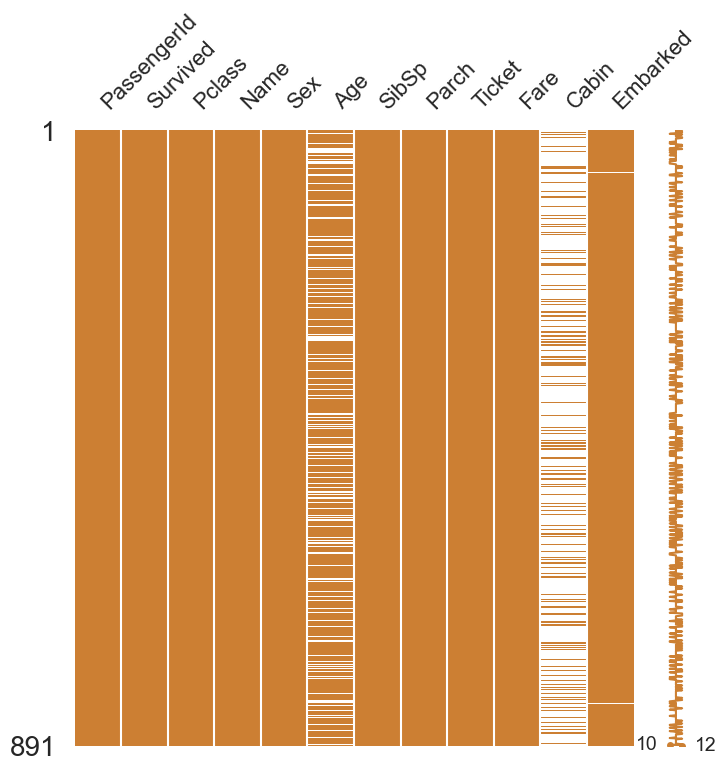

In [9]:
msno.matrix(df=df_train.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))
#msno.matrix:결측치 시각화

<Axes: >

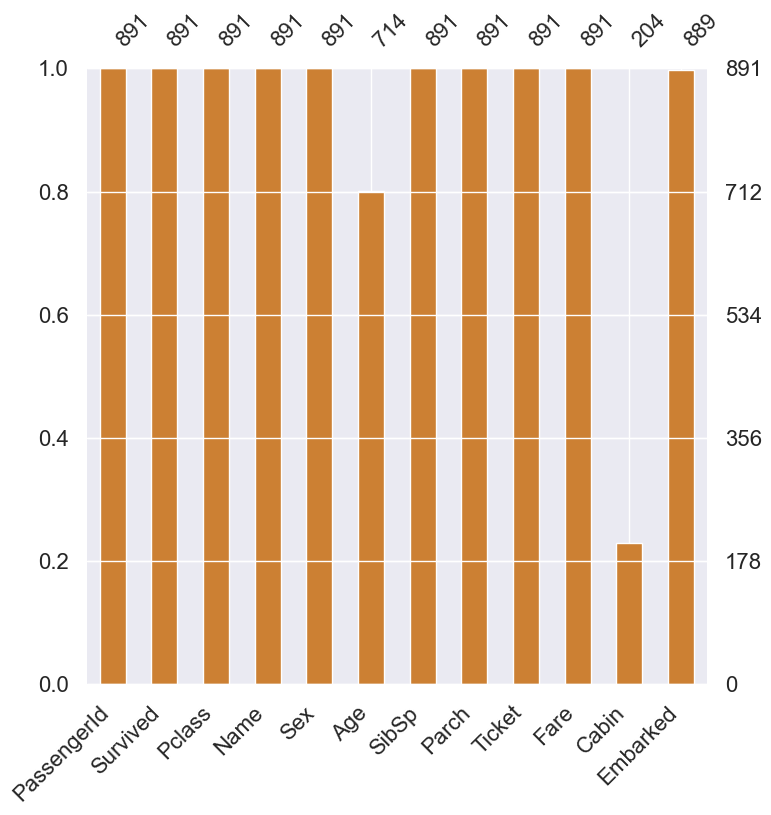

In [10]:
msno.bar(df=df_train.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

<Axes: >

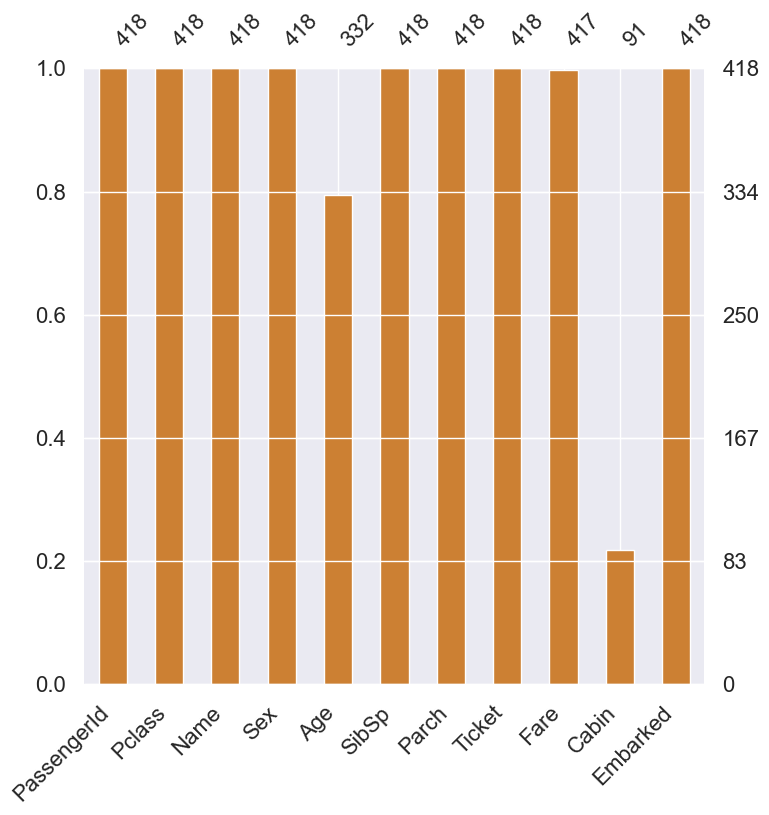

In [11]:
msno.bar(df=df_test.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

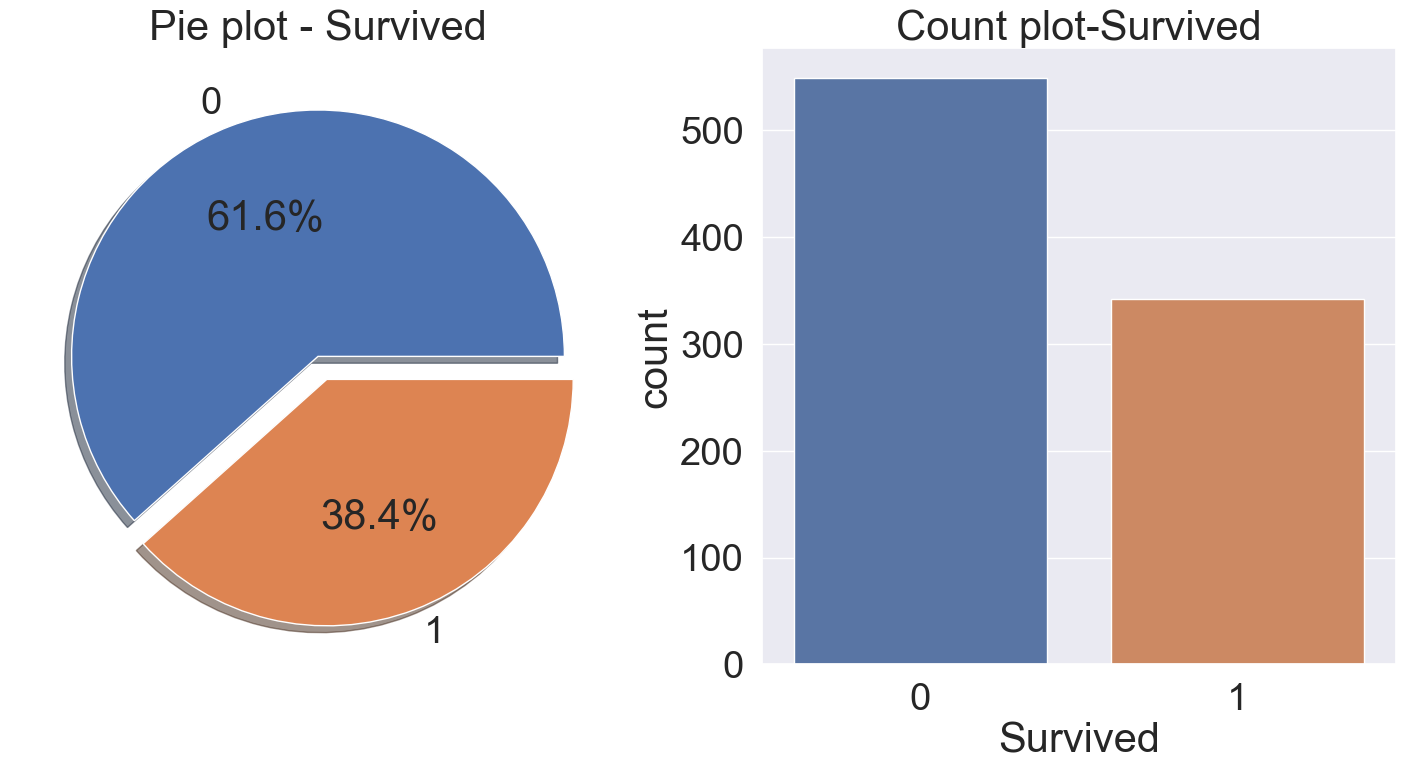

In [12]:
f, ax=plt.subplots(1,2,figsize=(18,8))

#subplots에선 두개의 값을 받을 수 있다, f(fig)는 전체 subplot을 말하고, ax(axe)로 전체 중 낱개를 말한다.

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0],
                                            shadow=True)
#ax[0]은 첫번째 위치를 말한다.
#explode는 파이를 튀어나오게 하고 싶을때 사용
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Count plot-Survived')

plt.show()

In [13]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count() #as_index=True : 그룹화된 결과에서 'Pclass'열을 인덱스로 설정

,Survived
Pclass,
1,216
2,184
3,491


In [14]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [16]:
pd.crosstab(df_train['Pclass'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')
#pd.crossstab:범주형 데이터 2개를 비교하는 교차분석표-각 값별로 행 열을 cross하여 개수를 셀 때 crosstab활용
#margins: 교차표의 행 합, 열 합 추가하기 default=False
#style.background_gradient(cmap=?): 수치의 크기를 색상 온도로 보는 것

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<Axes: xlabel='Pclass'>

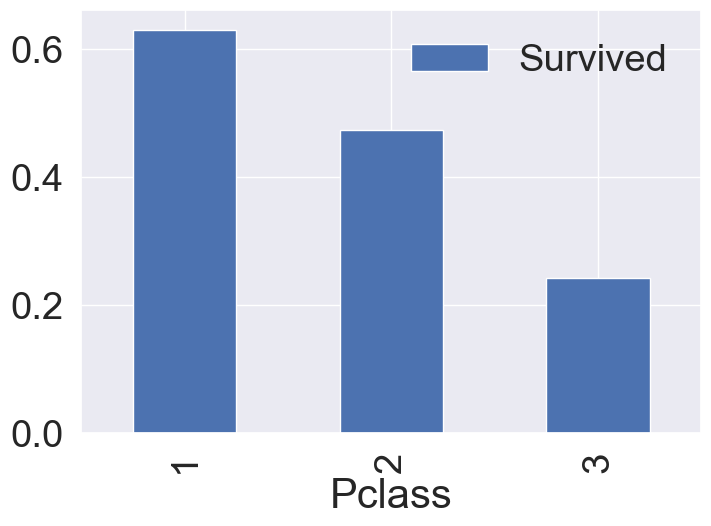

In [20]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar()
#plot.bar():막대그래프

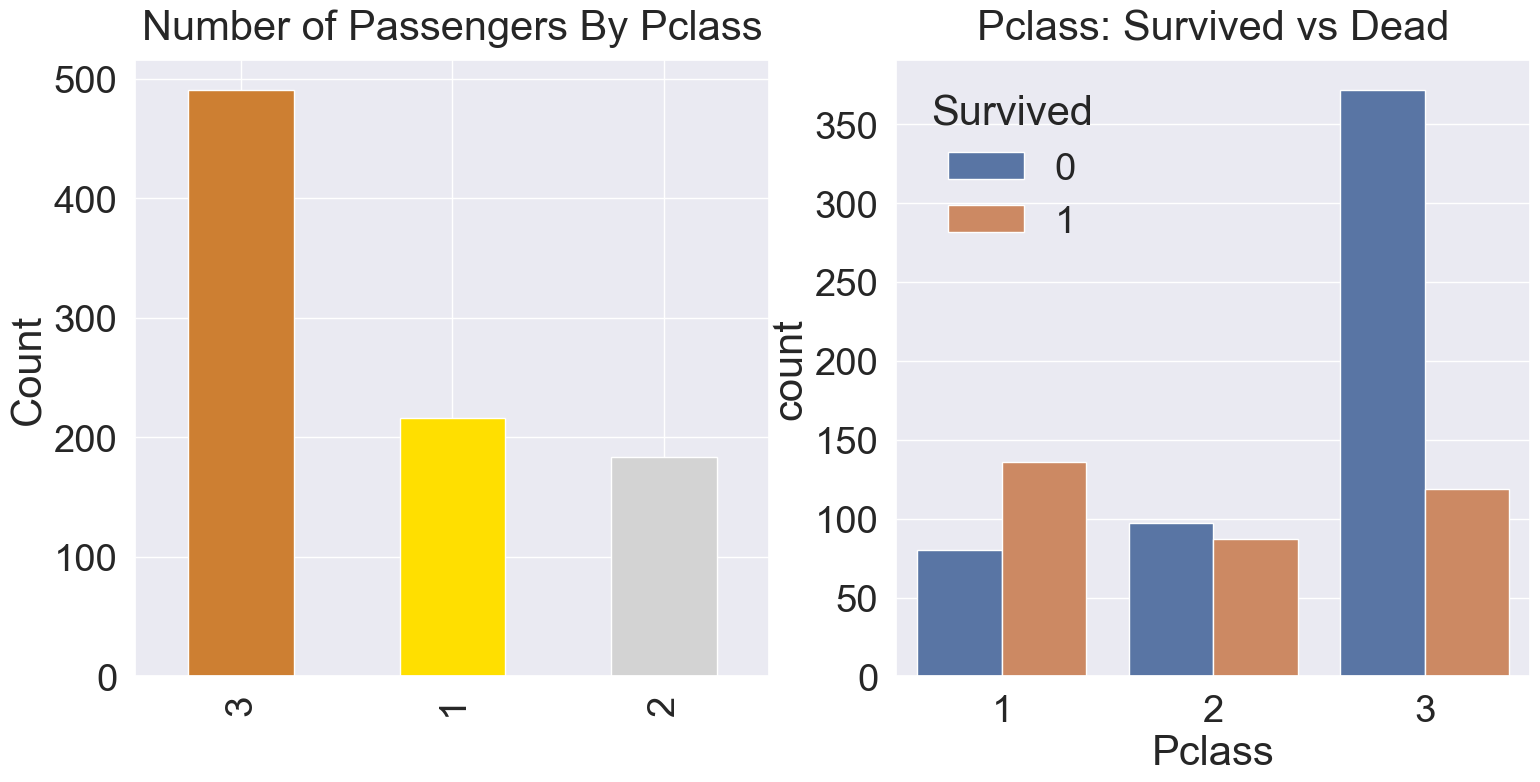

In [35]:
y_position=1.02
f, ax=plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=df_train, ax=ax[1]) #hue: group by a second variable
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

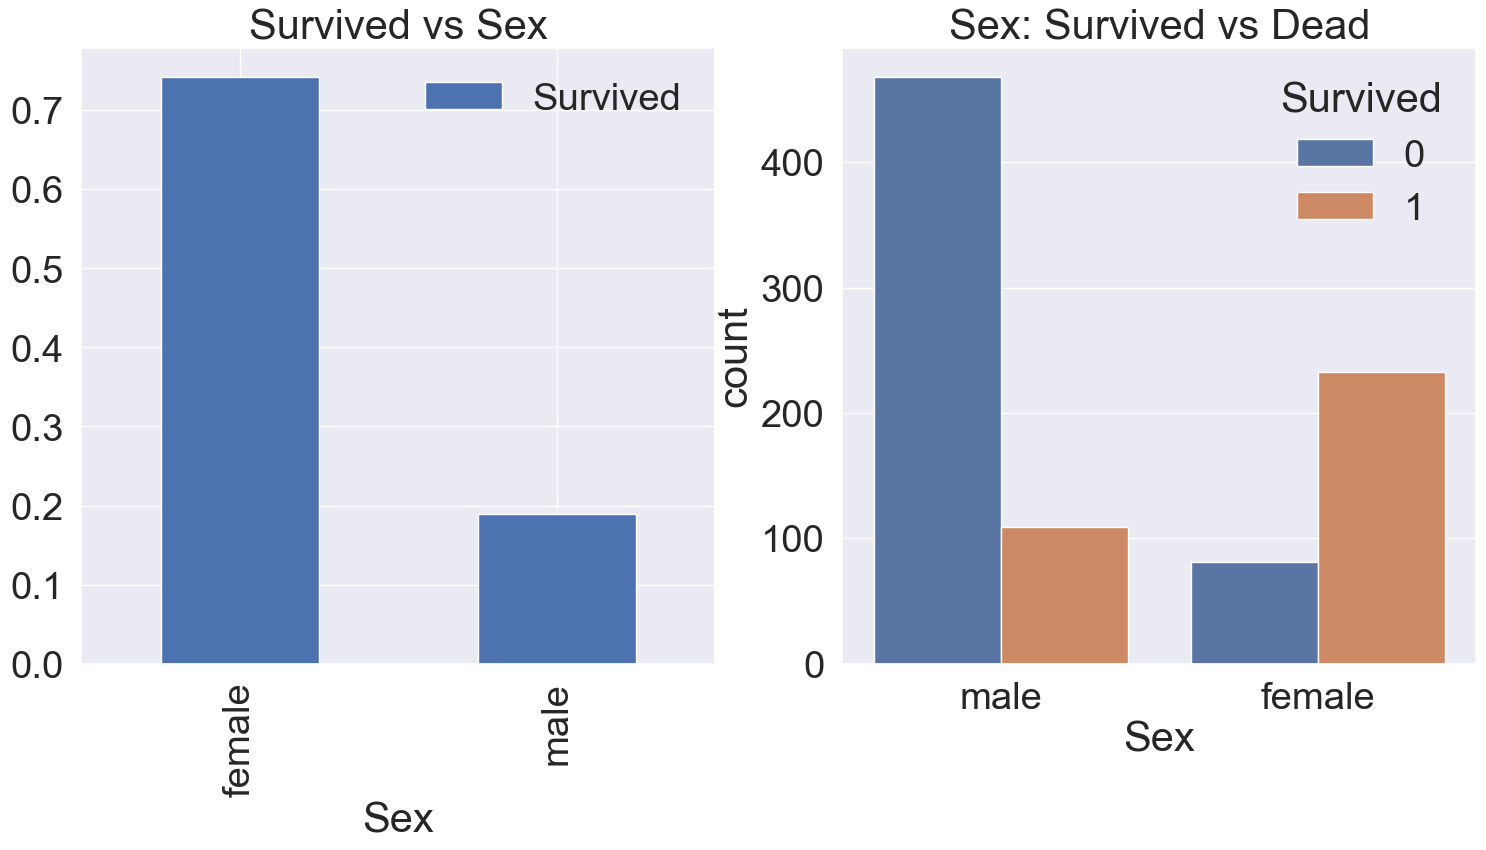

In [37]:
f, ax=plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [38]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [39]:
pd.crosstab(df_train['Sex'], df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


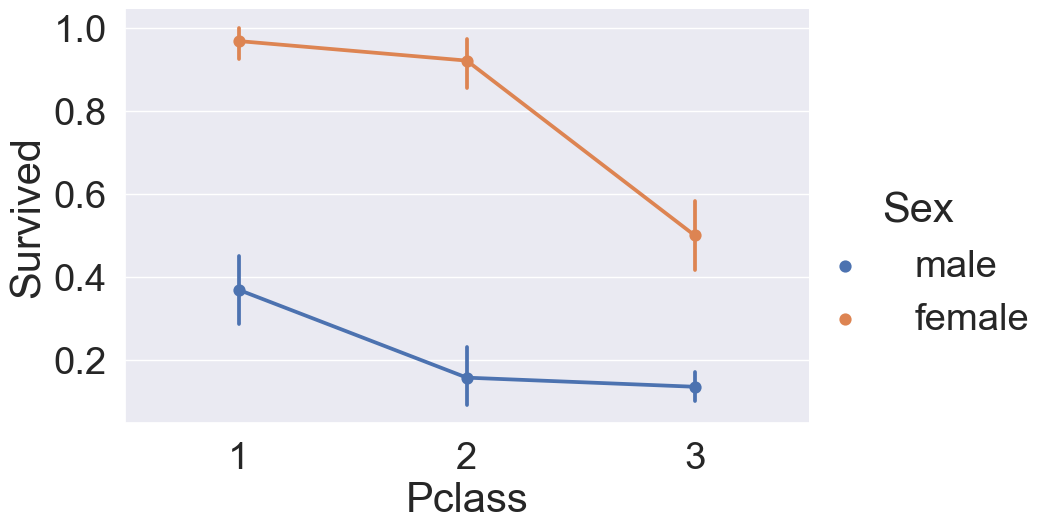

In [80]:
sns.catplot(x='Pclass',y='Survived',hue='Sex', data=df_train, kind='point', height=6,aspect=1.5)
#factorplot이 catplot으로 바뀜, size가 height로 바뀜
#꺾은선 그래프를 그리려면 kind='point'를 인수로 넣어야 함.

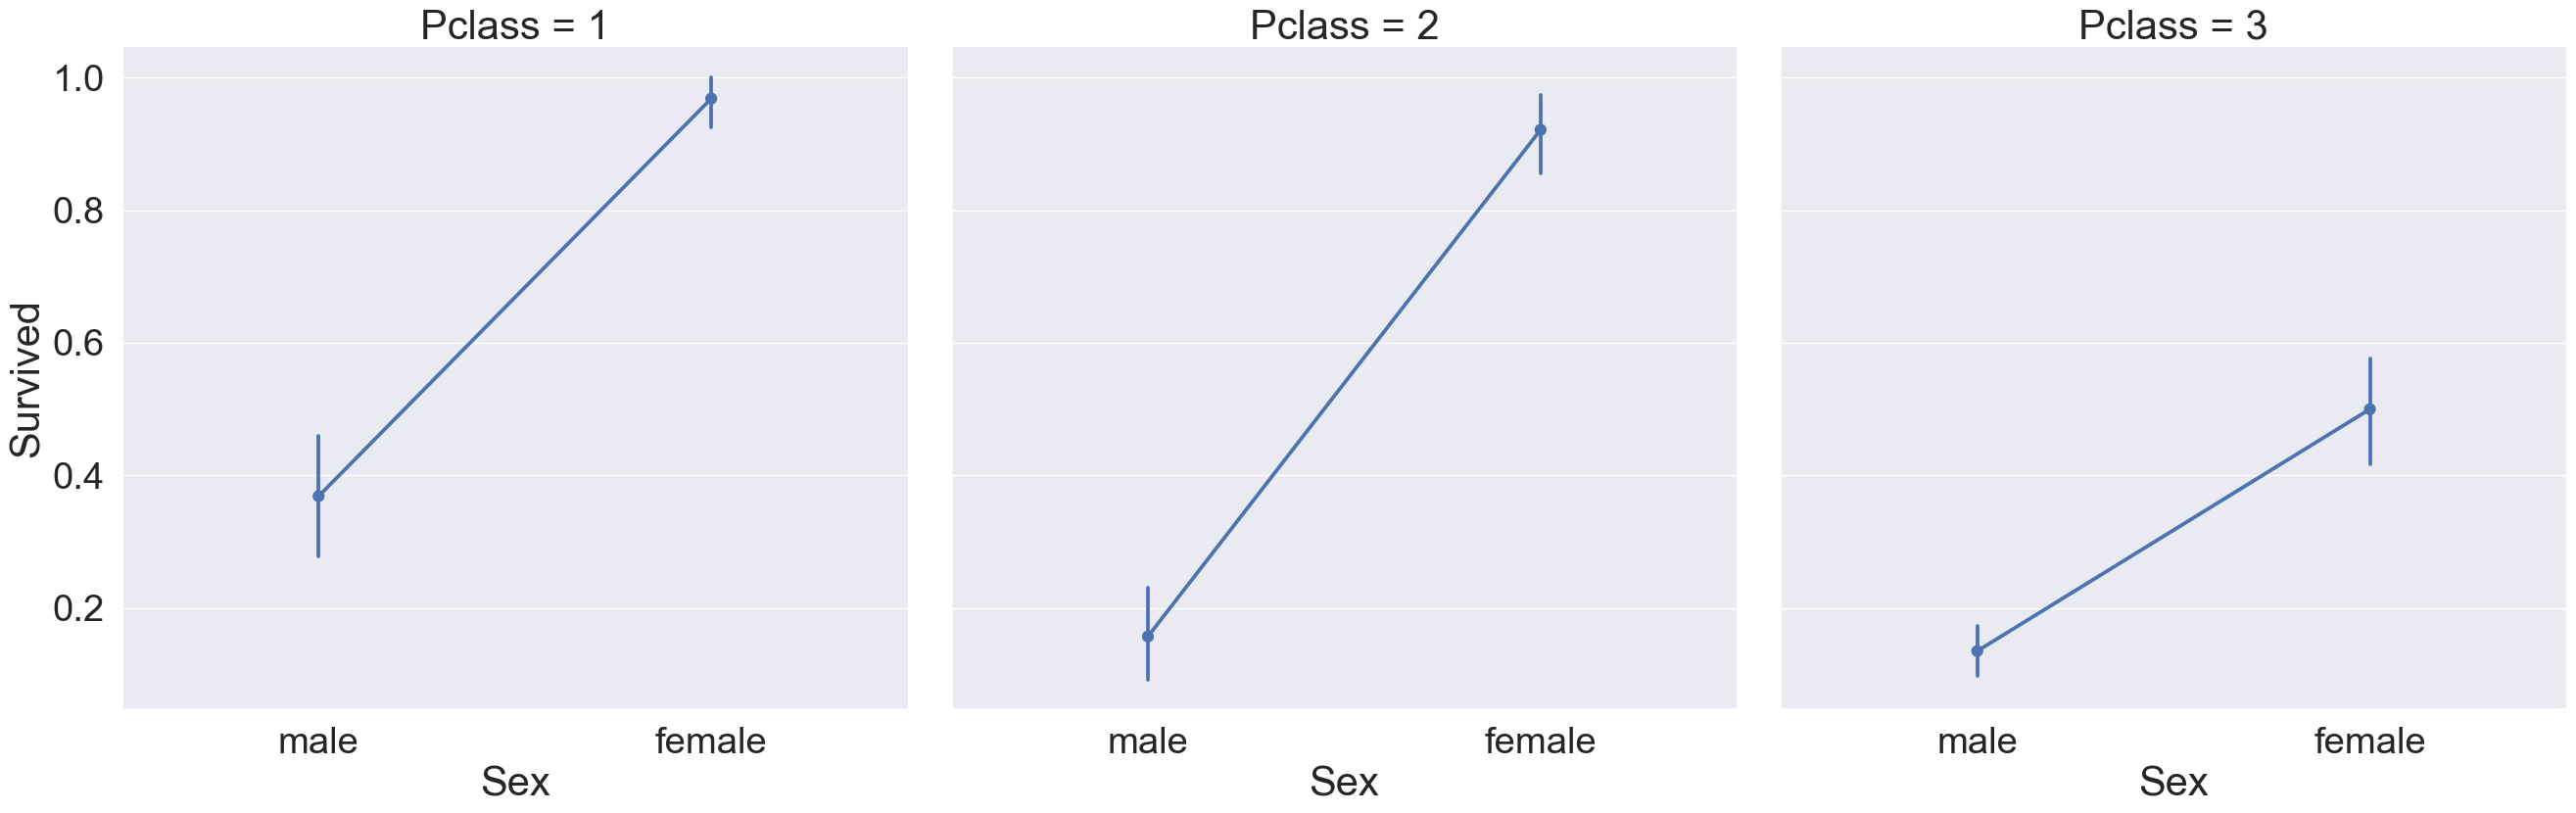

In [82]:
sns.catplot(x='Sex',y='Survived',col='Pclass',data=df_train, kind='point',height=9,aspect=1)

In [84]:
print('제일 나이 많은 탑승객: {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객: {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이: {:.1f} Years'. format(df_train['Age'].mean()))

제일 나이 많은 탑승객: 80.0 Years
제일 어린 탑승객: 0.4 Years
탑승객 평균 나이: 29.7 Years


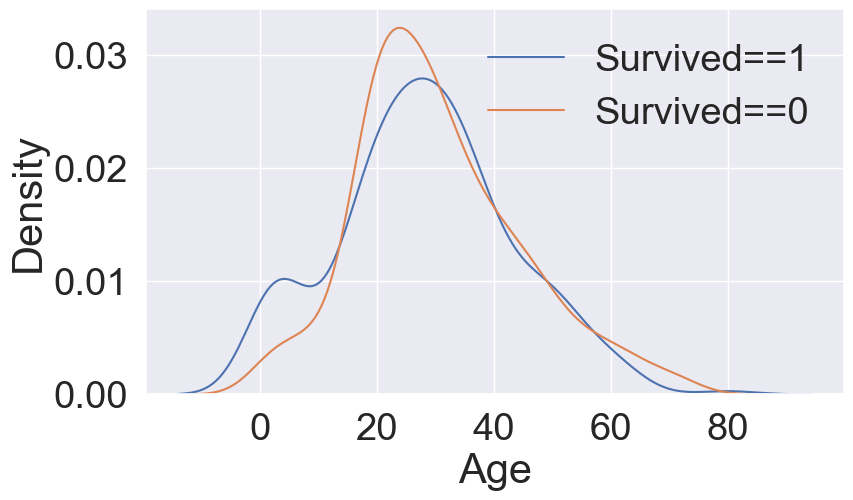

In [86]:
fig, ax=plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'],ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'],ax=ax)
plt.legend(['Survived==1', 'Survived==0']) #범례
plt.show()
#KDE== A kernel density estimate, analogous to a histogram


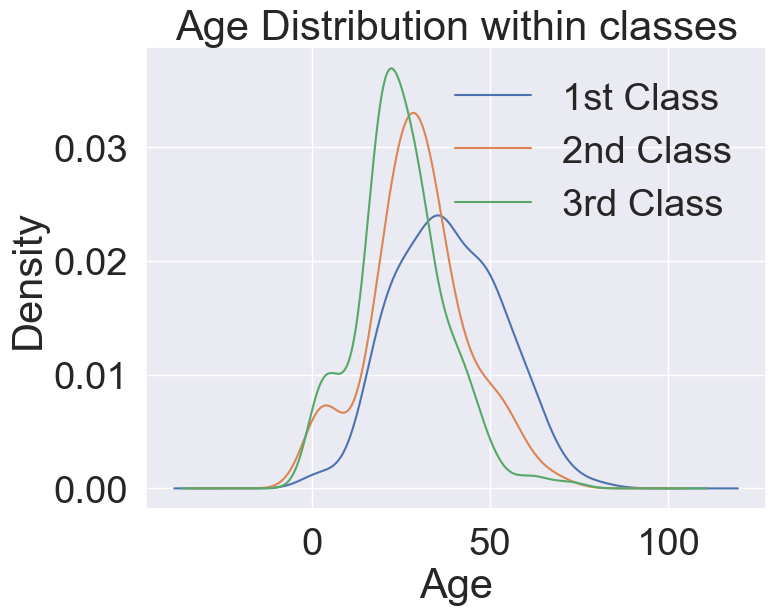

In [88]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class','2nd Class','3rd Class'])

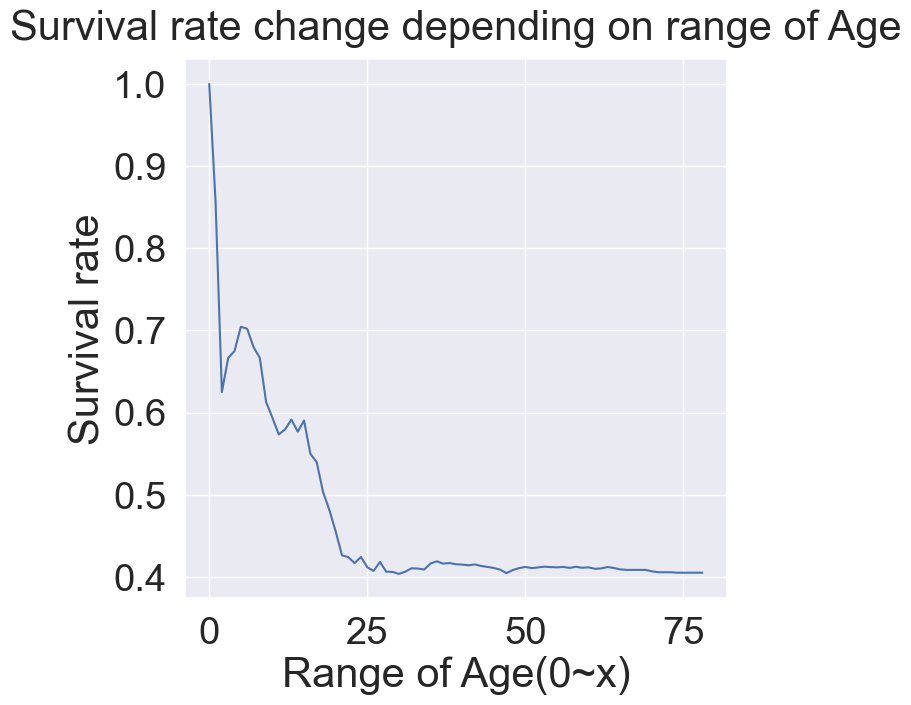

In [91]:
cummulate_survival_ratio=[]
for i in range(1,80):
    cummulate_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived']))
    #[df_train['Age']<i]['Survived']이 한묶음
plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt. ylabel('Survival rate')
plt. xlabel('Range of Age(0~x)')
plt.show()

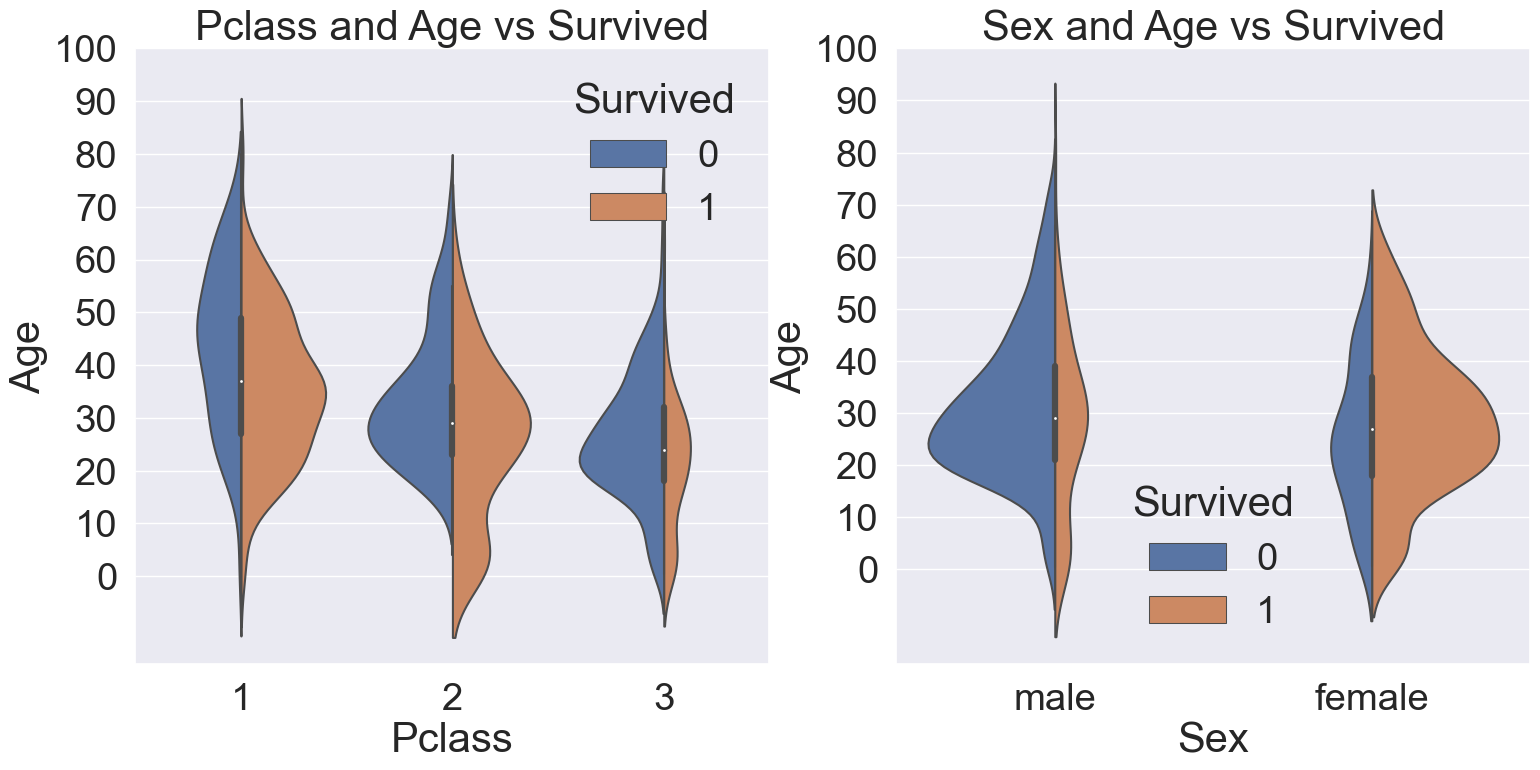

In [101]:
f, ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x='Pclass',y='Age', hue='Survived', data=df_train, scale='count',split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
#scale='count':If count, the width of the violins will be scaled by the number of observations in that bin.
#split=True:When using hue nesting with a variable that takes two levels, setting split to True will draw half of a violin for each level. 
#This can make it easier to directly compare the distributions.
sns.violinplot(x='Sex',y='Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

<Axes: xlabel='Embarked'>

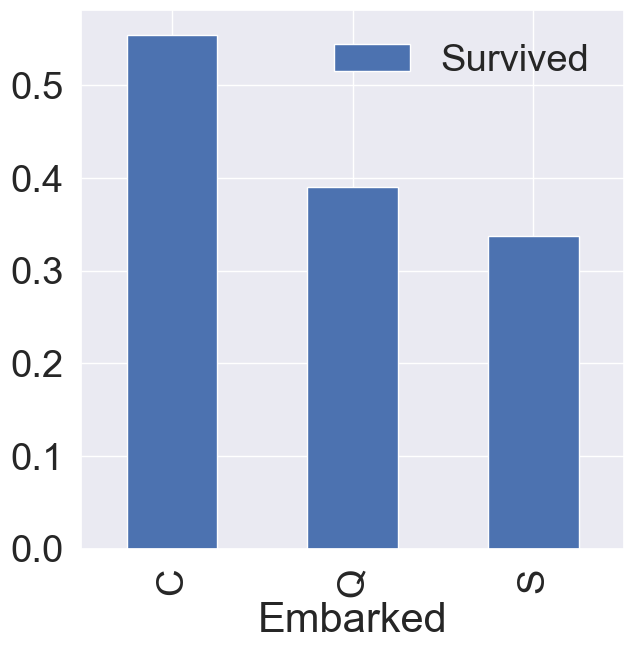

In [102]:
f, ax=plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

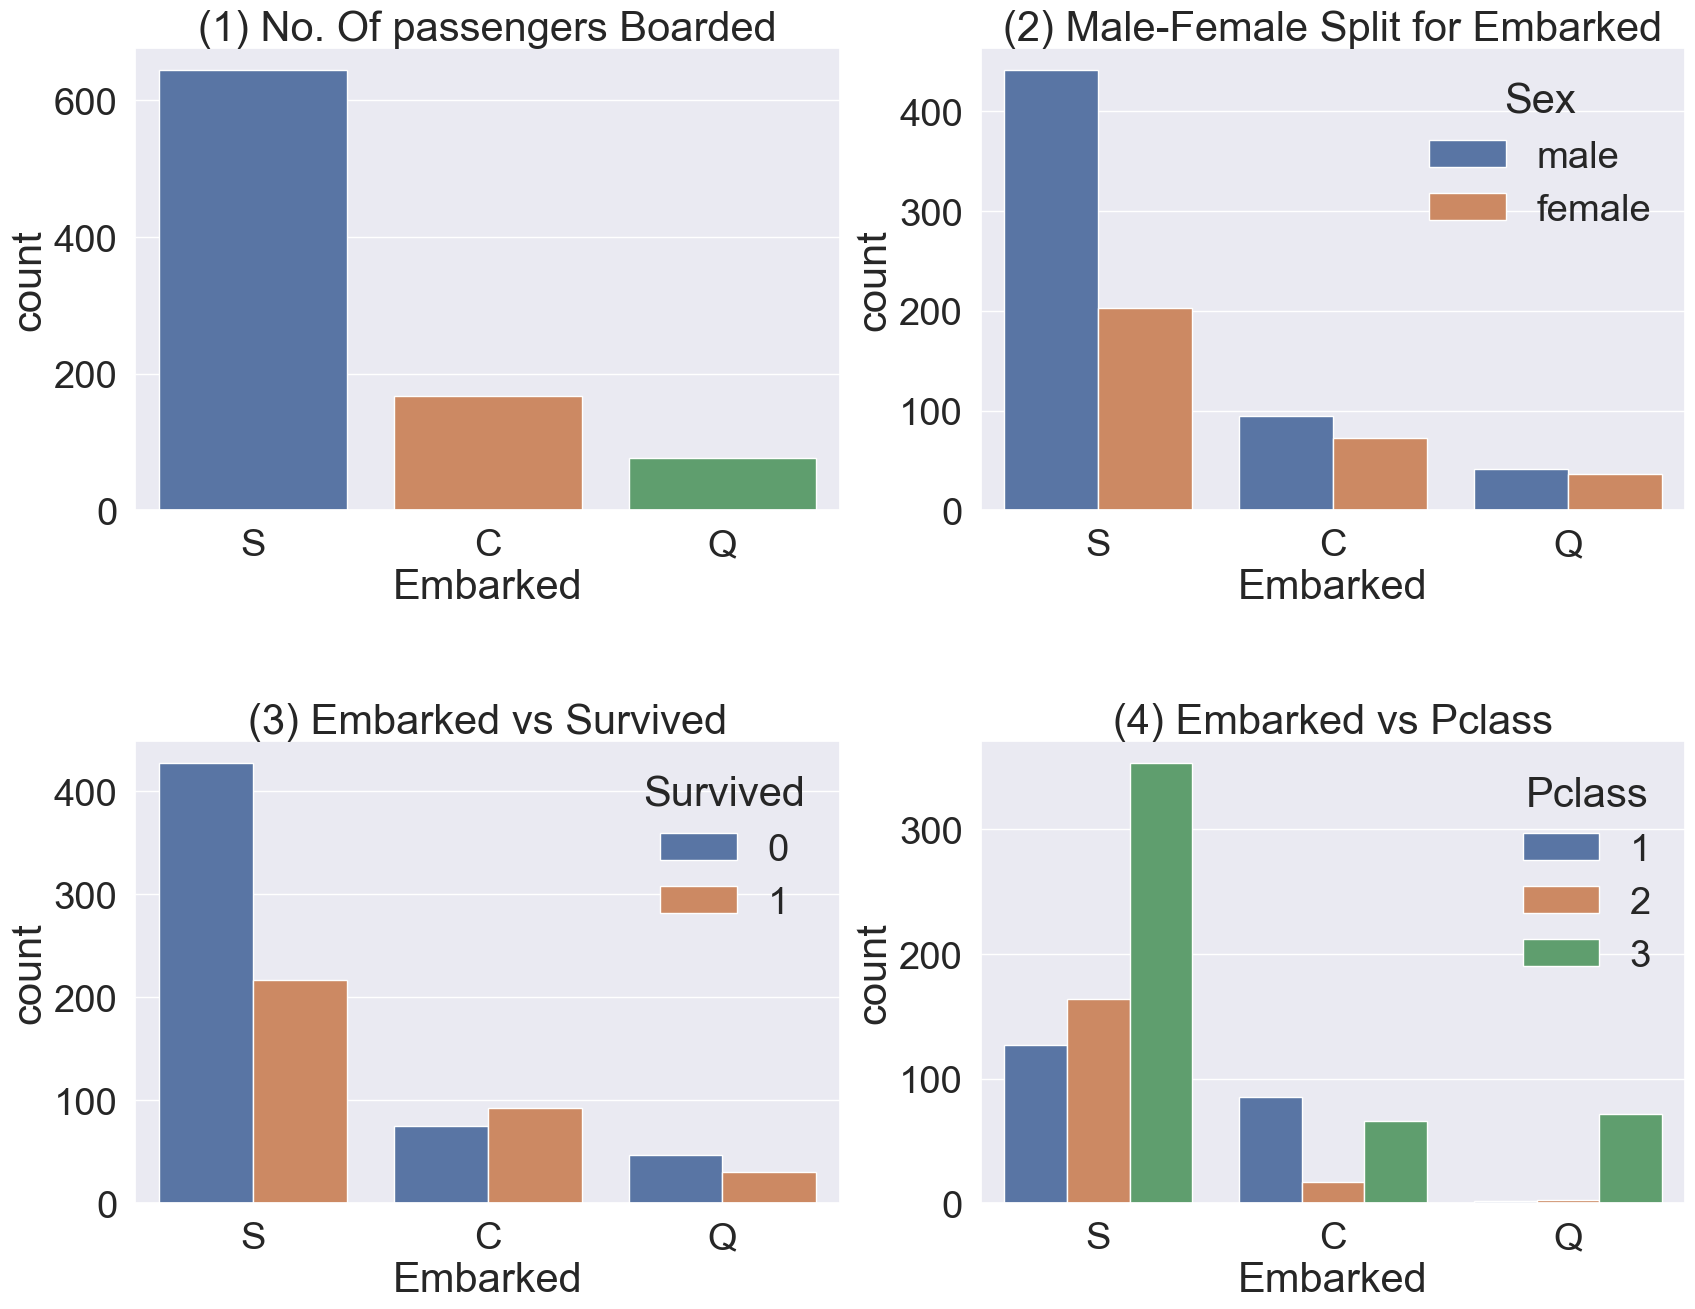

In [105]:
f, ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of passengers Boarded')

sns.countplot(x='Embarked',hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot(x='Embarked',hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [106]:
df_train['FamilySize']=df_train['SibSp']+df_train['Parch']+1 #자신을 포함해야하니 1을 더합니다
df_test['FamilySize']=df_test['SibSp']+df_test['Parch']+1 #자신을 포함해야하니 1을 더합니다

In [108]:
print("Maximum size of Family:",df_train['FamilySize'].max())
print("Minimum size of Family:", df_train['FamilySize'].min())

Maximum size of Family: 11
Minimum size of Family: 1


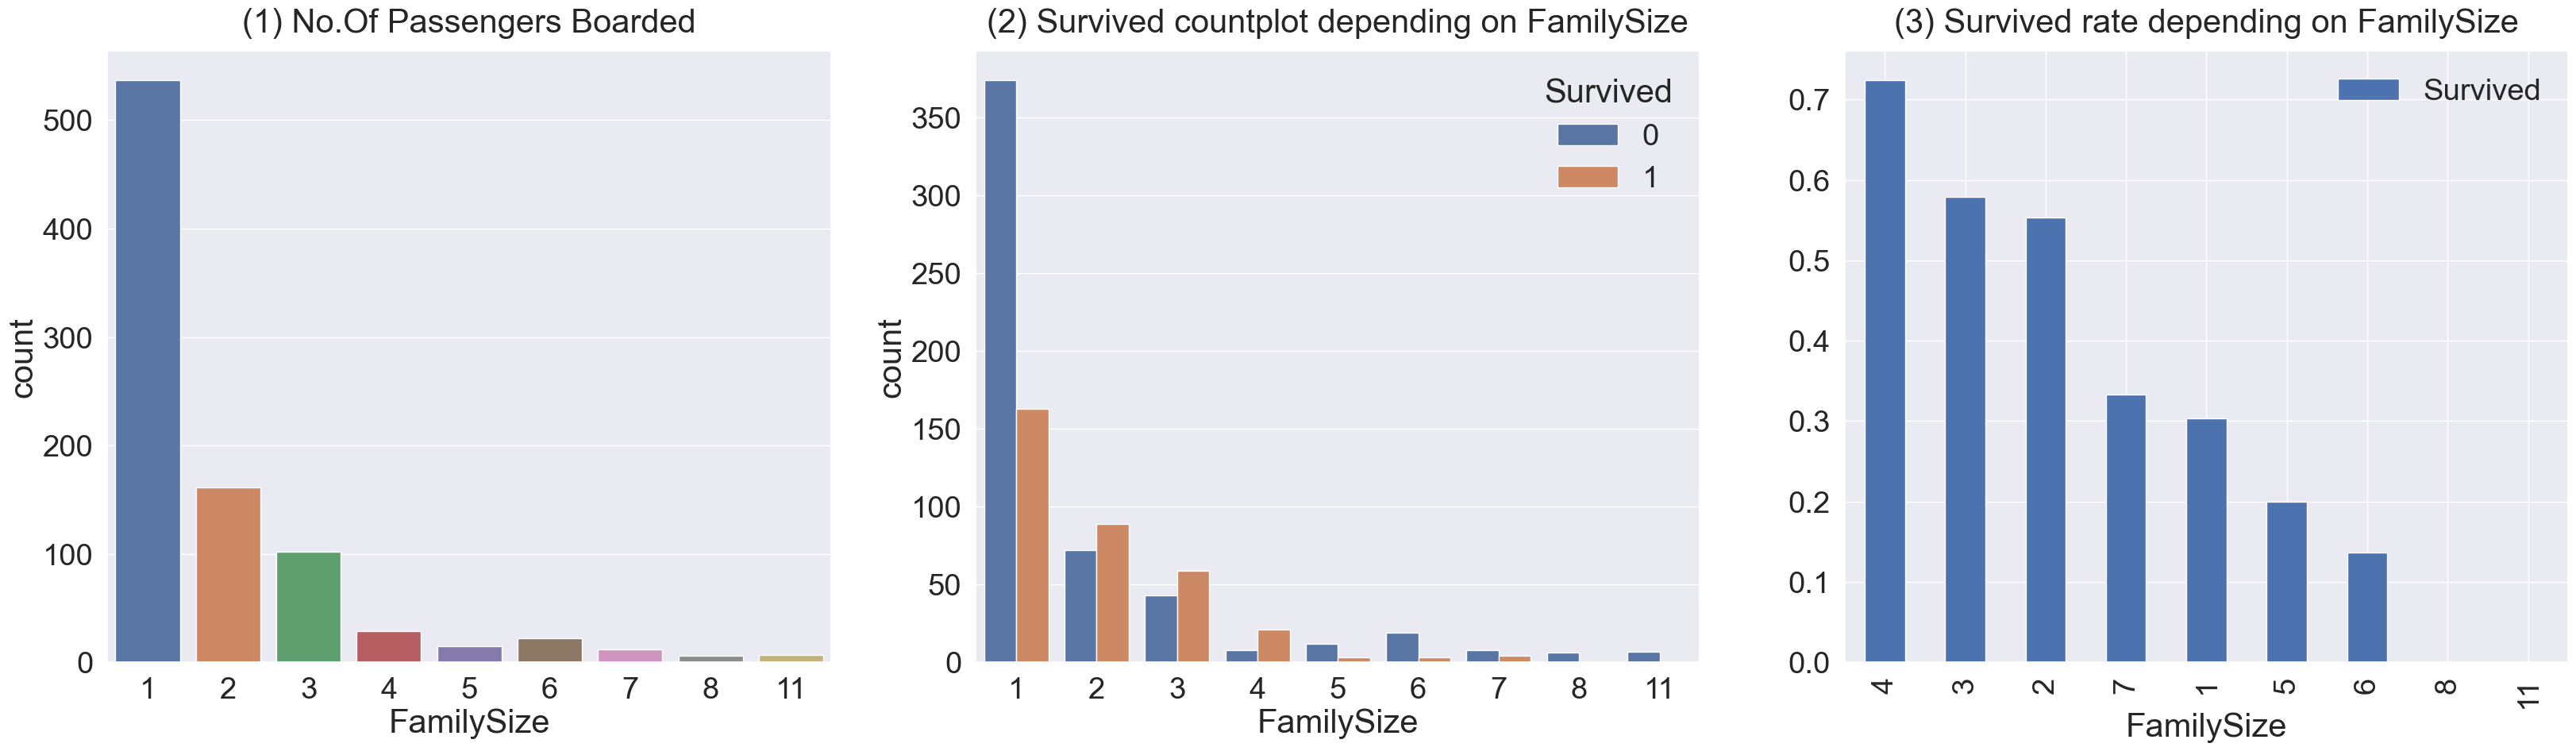

In [112]:
f, ax=plt.subplots(1,3,figsize=(40,10))
sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No.Of Passengers Boarded', y=1.02)

sns.countplot(x='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

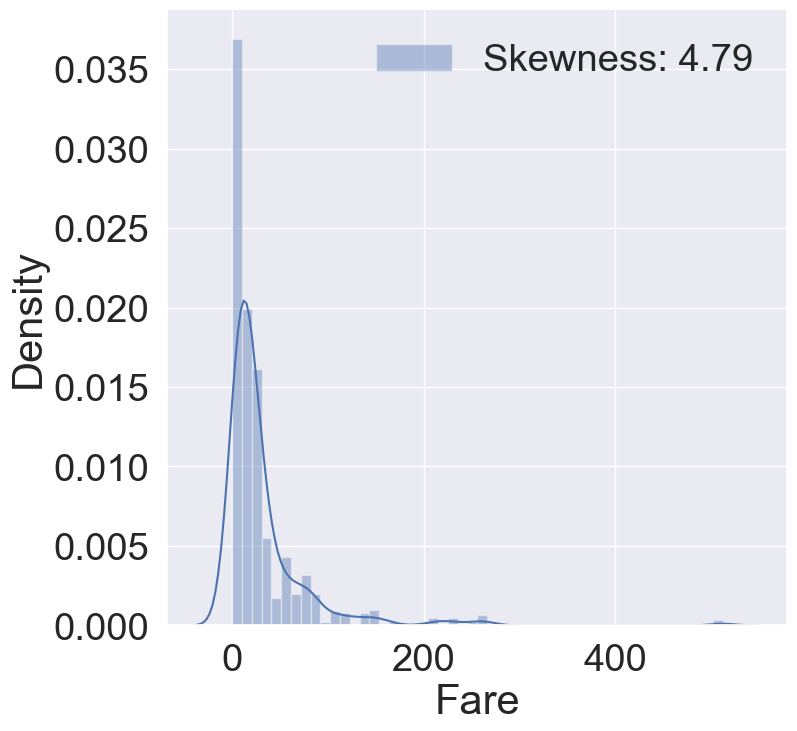

In [117]:
fig, ax= plt.subplots(1,1, figsize=(8,8))
g=sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()),ax=ax)
g=g.legend(loc='best')
#distplot:히스토그램과 커널밀도곡선(밀도그래프)로 시각화
#label:그래프의 범례 지정
#.skew():왜도 측정-분포의 비대칭도를 나타내는 통계량
#distribution이 매우 비대칭-> 만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수 도 있음.

In [119]:
df_test.loc[df_test.Fare.isnull(),'Fare']=df_test['Fare'].mean()
#testset에 있는 nan value를 평균값으로 치환합니다.

df_train['Fare']=df_train['Fare'].map(lambda i: np.log(i) if i >0 else 0)
df_test['Fare']=df_test['Fare'].map(lambda i: np.log(i) if i>0 else 0)

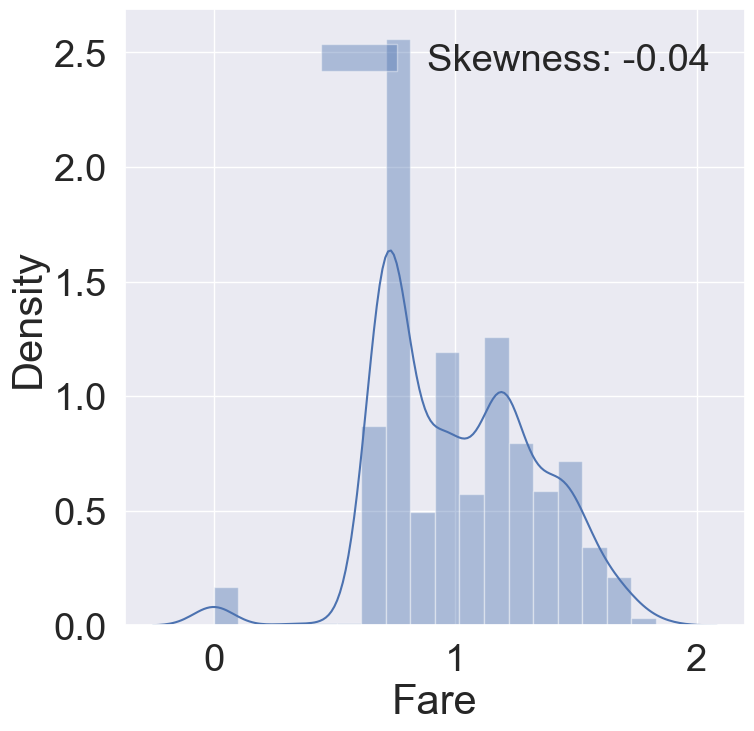

In [120]:
fig, ax= plt.subplots(1,1, figsize=(8,8))
g=sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()),ax=ax)
g=g.legend(loc='best')
#loc='best':범례의 위치를 최적의 위치로 설정
               

In [121]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.683603,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,1.450832,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.727559,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,1.379314,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,0.735091,NaN,S,1


In [122]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64